### Coeficientes de atracción mutua

Se levantan los coeficientes de atracción mutua del 1996 calculados por Macadar y Domínguez (2008), se calculan los mismos con datos del 2011 y se comparan ambas matrices

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from functions.cargar_data import *
from functions.func_demograficas import *

In [2]:
# "Carga datos del Censo INE 1996"
# Datos censales
# censo = pd.read_csv('tablas/personas_censo_1996.gz', compression='gzip', header=0, sep=',', quotechar='"')
# flujos_deptos = censo.loc[(censo.HACE5AQUI.isnull()) & (censo.HAC5DEPC <= 19)]
# flujos_deptos = flujos_deptos.loc[flujos_deptos.DPTO != flujos_deptos.HAC5DEPC]
# flujos_deptos['personas_mig'] = 1

# flujos_deptos['HAC5DEPC'] = flujos_deptos['HAC5DEPC'].astype(int)

# # agrupa y cuenta
# grupo = flujos_deptos.groupby(by=['DPTO', 'HAC5DEPC']).sum()
# grupo = pd.DataFrame(grupo.personas_mig).reset_index()
# grupo.head()

# # genera tabla pivot con los flujos de departamento a departamento
# matrix = pd.pivot_table(grupo,
#                         index = 'DPTO',
#                         columns='HAC5DEPC',
#                         fill_value=0,
#                         aggfunc='sum',
#                         margins=True,
#                         margins_name='Total')
# print(matrix)

# # levanta la matriz elaborada por Macadar y Dominguez (2008)
# matrix96 = pd.read_csv('tablas/matriz_deptos_96.csv', index_col='DEPID')
# matrix96

# # desapila la matriz
# grupo_pob = matrix96.unstack().dropna().reset_index()
# grupo_pob.columns = ['depto_origen', 'depto_destino', 'Mij']
# grupo_pob = grupo_pob.astype(int)

# # agrega Mji
# Mji = list(grupo_pob.sort_values(by=['depto_destino', 'depto_origen'])['Mij'])
# grupo_pob['Mji'] = Mji

# # agrega Pij y Pji
# pobl96 = recuperar_poblacion_1996_5años()
# grupo_pob = grupo_pob.merge(pobl96, left_on='depto_origen', right_on='DPTO')
# grupo_pob = grupo_pob.merge(pobl96, left_on='depto_destino', right_on='DPTO')
# grupo_pob.drop(['DPTO_x', 'DPTO_y'], axis=1, inplace=True)
# grupo_pob.rename({'poblacion_x': 'Pi', 'poblacion_y': 'Pj'}, inplace=True, axis=1)

# grupo_pob.head()

# grupo_pob['cam_round'] = get_cam()

# atr1996 = pd.pivot_table(grupo_pob,
#                         values='cam_round',
#                         index ='depto_origen',
#                         columns='depto_destino',
#                         fill_value=0).iloc[1:19, 0:18]

# atr1996_ar = np.tril(np.array(atr1996))
# atr1996_ar

In [3]:
# lee matriz de CAM 1996
atr1996 = pd.read_csv('tablas/atractividad_1996.csv',
                      index_col='deptos')

atr1996

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
deptos,,,,,,,,,,,,,,,,,,
2,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,34,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,3,1.0,2.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1,0.0,1.0,0.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,3,0.0,4.0,1.0,1.0,9.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2,0.0,2.0,2.0,0.0,1.0,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,5,2.0,4.0,5.0,3.0,2.0,2.0,3.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# convierte a numpy array 
atr1996_ar = np.array(atr1996)
print(atr1996_ar)

[[ 4. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [34.  2. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 4.  0.  2. nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 3.  1.  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 3.  1.  2.  1.  1. nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 1.  0.  1.  0.  2.  4. nan nan nan nan nan nan nan nan nan nan nan nan]
 [ 3.  0.  4.  1.  1.  9.  2. nan nan nan nan nan nan nan nan nan nan nan]
 [ 2.  0.  2.  2.  0.  1.  0.  3. nan nan nan nan nan nan nan nan nan nan]
 [ 5.  2.  4.  5.  3.  2.  2.  3. 13. nan nan nan nan nan nan nan nan nan]
 [ 3.  3.  1.  0.  1.  1.  1.  1.  0.  3. nan nan nan nan nan nan nan nan]
 [ 2.  1.  1.  0.  1.  2.  2.  1.  0.  2.  9. nan nan nan nan nan nan nan]
 [ 5.  2.  2.  2.  1.  1.  0.  1.  0.  1.  2.  1. nan nan nan nan nan nan]
 [ 3.  0.  2.  1.  1.  1.  0.  1.  3. 11.  1.  1.  0. nan nan nan nan nan]
 [ 4. 11.  1.  0.  1.  0.

In [5]:
p_migr = cargar_migrantes_internos()
p_migr.head()

,depto_origen,depto_destino,LOC,SECC,SEGM,VIVID,TIPO_VIVIE,HOGCOD,HOGID,PERPH02,...,PERED02_4,PERED03_R,PERED03_1,PERED03_2,PERED04_R,PERED05_R,PERED06_R,CODIGO_CAR,PERED08,NIVELEDU_R
0,3,1,20,1,1,5,1,102001001000501,1,1,...,0,0,11,0,2,3,4,55131,1,9
1,17,1,20,1,1,30,1,102001001003001,1,2,...,0,11,0,0,0,2,4,55152,1,9
2,18,1,20,1,1,36,1,102001001003601,1,1,...,0,0,6,0,2,2,0,33101,1,5
3,2,1,20,1,1,46,1,102001001004601,1,1,...,0,0,6,0,2,1,0,33101,1,5
4,12,1,20,1,1,93,1,102001001009301,1,2,...,0,0,4,0,2,1,0,22101,1,4


In [6]:
# recupera pobñación con 5 o más años de edad
pobl = recuperar_poblacion_2011_5años()
pobl.head(3)

,DPTO,poblacion
0,1,1236133
1,2,67863
2,3,484060


In [7]:
# genera un sólo dataframe solo para deptos
flujos_deptos = p_migr.loc[p_migr.depto_origen != p_migr.depto_destino, ['depto_origen', 'depto_destino']]
grupo = flujos_deptos.groupby(by=['depto_origen', 'depto_destino']).size()
grupo = pd.DataFrame(grupo, columns=['Mij']).reset_index()
grupo.head()

,depto_origen,depto_destino,Mij
0,1,2,914
1,1,3,33127
2,1,4,1387
3,1,5,2100
4,1,6,982


In [8]:
# genera un sólo dataframe solo para deptos
flujos_deptos = p_migr.loc[p_migr.depto_origen != p_migr.depto_destino, ['depto_origen', 'depto_destino']]
Mji = list(flujos_deptos.groupby(by=['depto_destino', 'depto_origen']).size())
grupo['Mji'] = Mji
grupo.head()

,depto_origen,depto_destino,Mij,Mji
0,1,2,914,2395
1,1,3,33127,11162
2,1,4,1387,1805
3,1,5,2100,2690
4,1,6,982,1610


In [9]:
grupo_pob = grupo.merge(pobl, left_on='depto_origen', right_on='DPTO')
grupo_pob = grupo_pob.merge(pobl, left_on='depto_destino', right_on='DPTO')
grupo_pob.drop(['DPTO_x', 'DPTO_y'], axis=1, inplace=True)
grupo_pob.rename({'poblacion_x': 'Pi', 'poblacion_y': 'Pj'}, inplace=True, axis=1)
grupo_pob.head()

,depto_origen,depto_destino,Mij,Mji,Pi,Pj
0,1,2,914,2395,1236133,67863
1,3,2,74,536,484060,67863
2,4,2,15,20,78717,67863
3,5,2,28,167,115155,67863
4,6,2,32,33,53162,67863


In [10]:
# calcula cam
grupo_pob['cam_round'] = get_cam(grupo_pob)

In [11]:
# genera matriz de atracción mutua
atr2011 = pd.pivot_table(grupo_pob,
                        values='cam_round',
                        index ='depto_origen',
                        columns='depto_destino',
                        fill_value=0).iloc[1:19, 0:18]

atr2011

depto_destino,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
depto_origen,,,,,,,,,,,,,,,,,,
2,3,0,1,0,1,1,0,0,0,2,2,1,2,0,6,1,0,1
3,26,1,0,1,1,1,0,3,2,3,1,1,2,1,1,3,1,1
4,2,0,1,0,0,1,0,1,1,4,1,0,2,1,0,0,0,2
5,4,1,1,0,0,1,1,1,0,2,1,2,1,0,1,3,8,1
6,2,1,1,1,1,0,3,6,1,1,1,1,1,1,0,1,1,4
7,1,0,0,0,1,3,0,2,0,1,0,2,0,0,0,2,2,1
8,2,0,3,1,1,6,2,0,3,2,1,1,1,1,0,4,1,1
9,2,0,2,1,0,1,0,3,0,6,0,0,0,2,0,1,0,1
10,4,2,3,4,2,1,1,2,6,0,2,2,1,7,2,1,2,2


In [12]:
# convierte en array y reemplaza el triángulo superior por ceros
atr2011_ar = np.tril(np.array(atr2011, dtype=np.float))
print(atr2011_ar)

[[ 3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [26.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  1.  1.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  1.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  3.  1.  1.  6.  2.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  2.  1.  0.  1.  0.  3.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 4.  2.  3.  4.  2.  1.  1.  2.  6.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  2.  1.  1.  1.  1.  0.  1.  0.  2.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 2.  1.  1.  0.  2.  1.  2.  1.  0.  2.  7.  0.  0.  0.  0.  0.  0.  0.]
 [ 3.  2.  2.  2.  1.  1.  0.  1.  0.  1.  1.  1.  0.  0.  0.  0.  0.  0.]
 [ 2.  0.  1.  1.  0.  1.  0.  1.  2.  7.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 3.  6.  1.  0.  1.  0.

In [13]:
dif = atr2011_ar - atr1996_ar

# diferencias a df
cols = list(atr1996.columns)
idx  = list(atr1996.index)
dif_df = pd.DataFrame(dif, columns = cols, index=idx)
dif_df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
2,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-8.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-2.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,0.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,-1.0,0.0,-1.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0.0,0.0,-1.0,0.0,-1.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1.0,0.0,-1.0,0.0,0.0,-3.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,-1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,-1.0,-1.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


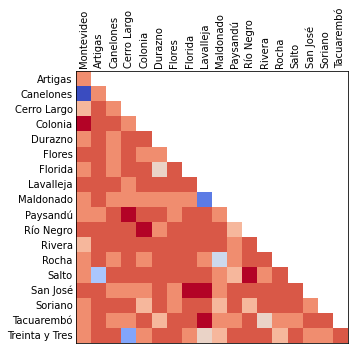

In [14]:
nomdep = ['Montevideo', 'Artigas', 'Canelones', 'Cerro Largo', 'Colonia', 'Durazno',
          'Flores', 'Florida', 'Lavalleja','Maldonado', 'Paysandú', 'Río Negro', 'Rivera',
          'Rocha', 'Salto', 'San José', 'Soriano', 'Tacuarembó', 'Treinta y Tres']

# a 2D array with linearly increasing values on the diagonal
fig = plt.figure(figsize=(5, 5))

ax = fig.add_subplot(111)
cax = ax.matshow(dif, cmap='coolwarm')

plt.xticks(np.arange(0, 18, step=1), labels=nomdep[0:18], rotation=90)
plt.yticks(np.arange(0, 18, step=1), labels=nomdep[1:19])

ax.tick_params(axis=u'both', which=u'both',length=0)

plt.show()

In [15]:
# decodifica índice
atr1996.set_index(decode_depto_short(atr1996.index), inplace=True)

# renombra índice
atr1996.index.names = ['depto origen']

In [23]:
# setea ancho de columnas
ancho = 'p{0.25cm}'
colformato='l' + ancho * 20

# exporta 1996
atr1996.to_latex(buf="tablas/matriz_atr1996.tex",
bold_rows=False,
na_rep='',
float_format="{:0.0f}".format,
column_format = colformato,
caption= 'Matriz de coeficientes de atracción mutua interdepartamental 1996 (Macadar y Domínguez, 2005)')

In [24]:
# exporta 2011
atr2011_ar_export = atr2011_ar
atr2011_ar_export[np.triu_indices(atr2011_ar_export.shape[0], 1)] = np.nan

# convierte el erray de 2011 en DF
cols = list(atr2011.columns)
idx  = decode_depto_short((atr2011.index))
atr2011_ar_export_df = pd.DataFrame(atr2011_ar_export, columns = cols, index=idx)

# exporta el DF a latex
atr2011_ar_export_df.to_latex(buf="tablas/matriz_atr2011.tex",
bold_rows=False,
na_rep='',
float_format="{:0.0f}".format,
column_format = colformato,
caption= 'Matriz de coeficientes de atracción mutua interdepartamental 2011, elaboración propia en base a INE (2011)')